## IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Dataset Connection

In [4]:
df=pd.read_csv("C:/Users/hp/Downloads/CO2 Emissions_Canada.csv")
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Corelation matrix and heat map 

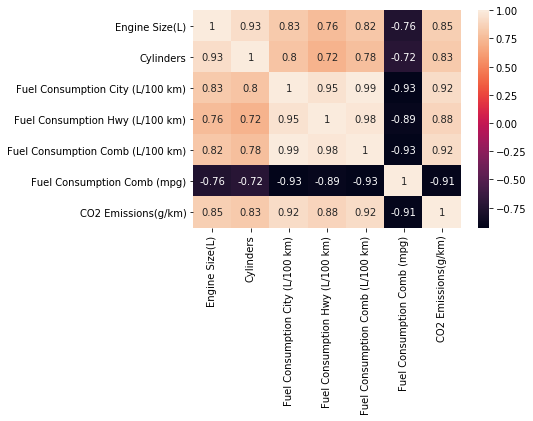

In [5]:
sns.heatmap(df.corr(),annot=True)

## Basic overview of dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.shape

(7385, 12)

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
df.isnull().count()

Make                                7385
Model                               7385
Vehicle Class                       7385
Engine Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
CO2 Emissions(g/km)                 7385
dtype: int64

## Model Training 

### Description of dependent and independent variables

In [87]:
X=df.loc[:,"Engine Size(L)":'Fuel Consumption Comb (mpg)']
X=X.drop(['Transmission','Fuel Type','Fuel Consumption Comb (mpg)'],axis=1)
Y=df.loc[:,'CO2 Emissions(g/km)']

### Division of  Raw Data into test and train data

In [103]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=0)

### Applying Multiple Linear Regression Model

In [104]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.intercept_,lin_reg.coef_

(52.54651090325177,
 array([ 5.21033725,  7.12964211, -5.42360839, -4.6104571 , 22.8653628 ]))

### Prediction of Output on Training data

In [105]:
prediction=lin_reg.predict(x_train)
print(sum(prediction)/len(prediction))

249.29248476641845


### Accuracy on training data

In [106]:
lin_reg.score(x_train,y_train)

0.8808767275286365

### Output on testing Data

In [107]:
predict=lin_reg.predict(x_test)
print(sum(predict)/len(predict))

250.433816742409


### Accuracy on testing data

In [109]:
lin_reg.score(x_test,y_test)

0.8783545840264559

### Model Application on random Data

In [110]:
predict1=lin_reg.predict([[3.5,6,12.1,8.7,10.6]])
print(sum(predict1)/len(predict1))

250.19675128568417
